In [1]:
 from fastai.vision.all import *

## 1. Data

In [2]:
 def paths():
    #path_root = Path('/media/ben/Ubuntu 20_04_4 LTS amd64/submeeting_2022/submeeting_images/')
    path_root = Path("/mnt/narval/narval_BL/submeeting_2022/")
    #path_dataset = path_root/"total_images_su/total_320x240_su/"
    path_dataset = path_root/"datasets/dataset_su/total_320x240_su"
    #path_dataframe = path_root/'pickle_dataframes/df_total_unique_folder.pkl'
    path_dataframe = path_root/"pickle_files/df_total_datasetsu.pkl"
    path_pickle = path_root/'pickle_dataframes/'
    path_save_models =Path('/media/ben/Data_linux/code/submeeting_code/notebook/models/')
    print(path_dataset)
    print(path_dataframe)
    return path_root, path_dataset, path_dataframe, path_pickle, path_save_models

path_root, path_dataset, path_dataframe, path_pickle, path_save_models = paths()

/mnt/narval/narval_BL/submeeting_2022/datasets/dataset_su/total_320x240_su
/mnt/narval/narval_BL/submeeting_2022/pickle_files/df_total_datasetsu.pkl


In [3]:
class DataDistribution:
    """ create a dictionary with class and plot an histogram"""
    def __init__(self, df):
        self.df = df
        
    
    def data_dict(self):
        """ fonction to return a dictionnary with the number of images per classes"""

        classes = ['algen', 'divers', 'robots', 'rocks', 'sand', 'structure', 'water_only']

        algen_rocks = df.loc[df.labels=='algen rocks', 'labels'].count() #03
        algen_sand = df.loc[df.labels=='algen sand', 'labels'].count()   #04
        algen_rocks_sand = df.loc[df.labels=='algen rocks sand', 'labels'].count() #034
        algen_rocks_sand_structure = df.loc[df.labels=='algen rocks sand structure', 'labels'].count() #0345
        algen_sand_structure = df.loc[df.labels=='algen sand structure', 'labels'].count() #045
        algen_rocks_structure = df.loc[df.labels=='algen rocks structure', 'labels'].count()  #035
        algen_rocks_robots = df.loc[df.labels=='algen rocks robots', 'labels'].count() #023
        algen_rocks_robots_structure = df.loc[df.labels=='algen rocks robots structure', 'labels'].count() #0235
        algen_divers_rocks = df.loc[df.labels=='algen divers rocks', 'labels'].count()       #013                                        
        algen_rocks_robots_sand = df.loc[df.labels=='algen rocks robots sand', 'labels'].count() #0234
        water = df.loc[df.labels=='water_only', 'labels'].count()   #6
        robots_structure = df.loc[df.labels=='robots structure', 'labels'].count() #25
        divers = df.loc[df.labels=='divers', 'labels'].count() #1
        robots = df.loc[df.labels=='robots', 'labels'].count() #2

        dict_multiclass = {'03':algen_rocks,
                       '04':algen_sand,
                       '034':algen_rocks_sand,
                       '0345':algen_rocks_sand_structure,
                       '045':algen_sand_structure,
                       '035':algen_rocks_structure,
                       '023':algen_rocks_robots,
                       '0235':algen_rocks_robots_structure, 
                       '013': algen_divers_rocks,
                       '0234': algen_rocks_robots_sand,
                        '6': water,
                        '25': robots_structure,
                        '1': divers,
                        '2': robots
                            }
        return dict_multiclass
    
    def plot_hist(self):
        dfhist = pd.Series(self.data_dict(), index =['03', '04', '034', '0345',
                                            '045', '035','023','0235','013','0234','6', '25', '1', '2'])
        dfhist.plot.bar()
        plt.xlabel('class')
        plt.ylabel('number')

In [5]:
df_new = pd.read_pickle(path_dataframe)
df = df_new.drop_duplicates(subset=['fname']).reset_index(drop=True)
print(df.head())
print(df.tail())

           fname            labels  is_valid  \
0  000000_b2.jpg  algen rocks sand      True   
1  000025_b2.jpg  algen rocks sand     False   
2  000050_b2.jpg  algen rocks sand     False   
3  000075_b2.jpg  algen rocks sand      True   
4  000100_b2.jpg  algen rocks sand     False   

                        labels_encoded  
0  [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]  
1  [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]  
2  [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]  
3  [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]  
4  [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]  
             fname      labels  is_valid                       labels_encoded
743  005950_p4.jpg  water_only     False  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
744  005975_p4.jpg  water_only     False  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
745  006000_p4.jpg  water_only     False  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
746  006025_p4.jpg  water_only      True  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
747  006050_p4.jpg  water_only     False  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.

In [6]:
df = df.drop(columns='labels_encoded', axis=1)               # fastai will encod  automatically the class labels
print(df.head())

           fname            labels  is_valid
0  000000_b2.jpg  algen rocks sand      True
1  000025_b2.jpg  algen rocks sand     False
2  000050_b2.jpg  algen rocks sand     False
3  000075_b2.jpg  algen rocks sand      True
4  000100_b2.jpg  algen rocks sand     False


{'03': 385, '04': 10, '034': 53, '0345': 72, '045': 1, '035': 64, '023': 9, '0235': 23, '013': 17, '0234': 0, '6': 92, '25': 2, '1': 3, '2': 17}


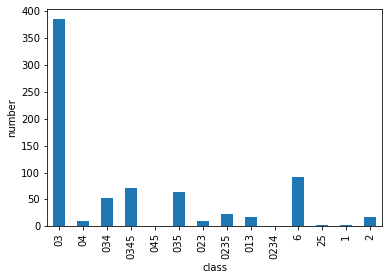

In [7]:
D1 = DataDistribution(df)
print(D1.data_dict())
D1.plot_hist()

In [8]:
def check():
    dict_multiclass = D1.data_dict()
    total = sum(dict_multiclass.values())
    print(f"total number of images: {total}")

    assert(total == df.shape[0])
check()

total number of images: 748


In [7]:
 # fonctions that will be use in the fastai datablock class
def get_x(r): return path_dataset/r['fname']                    # acess the  dependent X variable (image)
def get_y(r): return r['labels'].split(' ')                     # acess the independent Y variable (labels)
def splitter(df):                                               # define how we split the train and valid dataset
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist() 
    return train, valid

train, valid = splitter(df)
print(f'train dataset size: {len(train)}, valid dataset size: {len(valid)}')

train dataset size: 583, valid dataset size: 165


## 2. Parameters and metrics

In [8]:
# Parameters
IM_SIZE = (128,128)               # image size
BS= 8                             # batch size
LR = 3e-3                         # learning rate

# metrics
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'
precision_multi = PrecisionMulti(average='macro')
recall_multi = RecallMulti(thresh=0.5, average='macro')

## 3. Fastai datablock and dataloader

In [9]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),                        # multi label classification
                   splitter=splitter,                                              # how we split
                   get_x=get_x,                                                    # how we acess X
                   get_y=get_y,                                                    # how we acess Y
                   item_tfms = RandomResizedCrop(IM_SIZE, min_scale=0.35))         # size & augmentation


In [16]:
# data pipeline summary
#dblock.summary(df)       # uncomment to see all the pipeline operation from the input to the dataloader, which
                          # will feed the model

In [10]:
 # create dataloaders
dls = dblock.dataloaders(df, bs=BS)

In [13]:
 # show classes
dls.vocab

['algen', 'divers', 'robots', 'rocks', 'sand', 'structure', 'water_only']

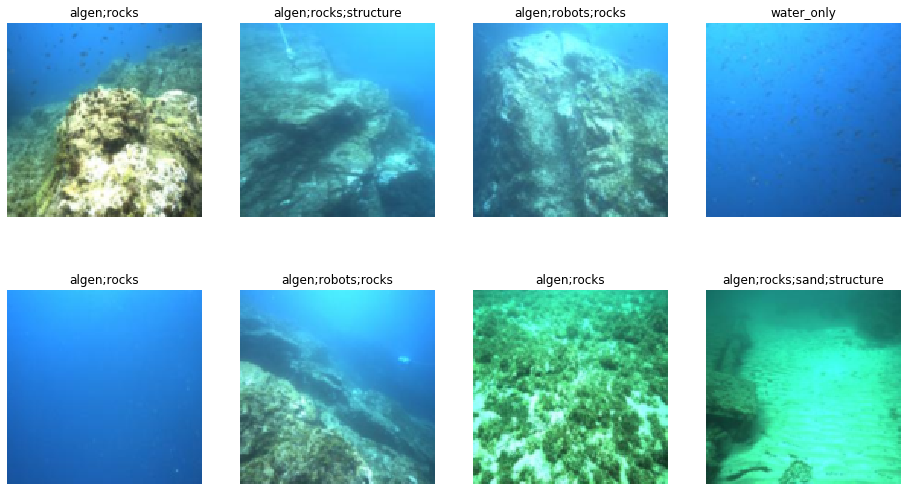

In [16]:
# show some datas
dls.show_batch(nrows=2, ncols=4, figsize=(16,9))

## 4. Model

In [15]:
  # loss function: Flattened Binary Cross Entropy with logits Loss. Its  combine a log and sigmoid function. 
# The outputs of the model are logits


# set up the model: resnet18, dataloaders, loss_function and metrics
learn = vision_learner(dls, resnet18, metrics=[partial(accuracy_multi, thresh=0.5),
                                               precision_multi,
                                               recall_multi,
                                               f1_macro]).to_fp16()



SuggestedLRs(valley=0.00363078061491251)

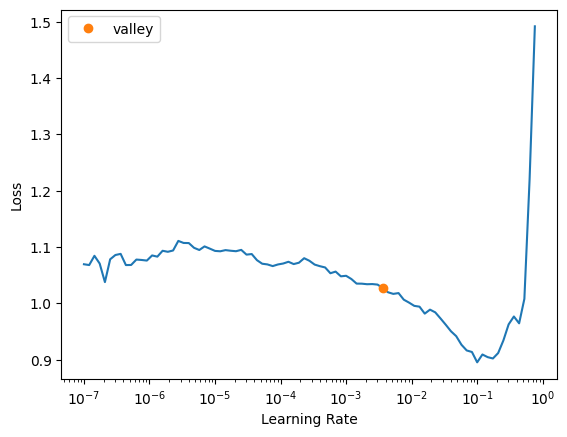

In [17]:
# find the optimal learning rate
learn.lr_find() 
#learn.remove_cb(ProgressCallback)

In [18]:
# training loop freeze all weights of  the layers excepts the few last for 5 epochs, 
# fine tune on all the weights of the layers for 4 epochs
LR = 3e-3
learn.fine_tune(3, base_lr=LR, freeze_epochs=5)

epoch,train_loss,valid_loss,accuracy_multi,precision_score,recall_score,F1(macro),time
0,0.898348,0.681389,0.670130,0.460507,0.847081,0.494133,00:04
1,0.753927,0.484849,0.787879,0.549472,0.874818,0.592630,00:04
2,0.537139,0.239934,0.914286,0.694831,0.744166,0.712721,00:04
3,0.352251,0.202980,0.910823,0.742778,0.746598,0.707669,00:04
4,0.266435,0.176606,0.942857,0.832159,0.812166,0.803317,00:04


epoch,train_loss,valid_loss,accuracy_multi,precision_score,recall_score,F1(macro),time
0,0.244887,0.313658,0.885714,0.738563,0.744393,0.720356,00:06
1,0.234006,0.132709,0.942857,0.881584,0.805269,0.816639,00:06
2,0.184570,0.126726,0.950649,0.882098,0.839478,0.852447,00:06


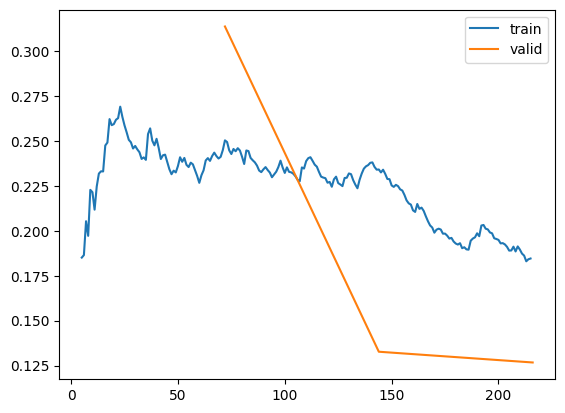

In [19]:
learn.recorder.plot_loss()

/media/ben/Data_linux/code/Code_testing/contrastive_learning/submeeting_2022/class_sup/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ben/Data_linux/code/Code_testing/contrastive_learning/submeeting_2022/class_sup/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/ben/Data_linux/code/Code_testing/contrastive_learning/submeeting_2022/class_sup/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted

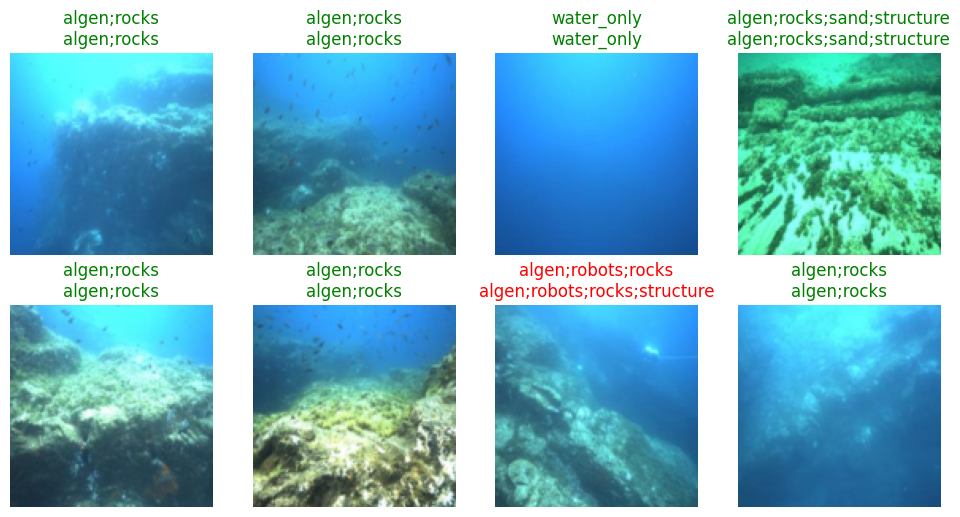

In [21]:
learn.show_results()

In [22]:
learn.save('notebook_res18_stage1')

Path('models/notebook_res18_stage1.pth')